<a href="https://colab.research.google.com/github/DLSireesha/Campus_Placement_Prediction/blob/main/Campus_Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Problem Statement:*
The Placement of students is one of the most important objective of an educational
institution. Reputation and yearly admissions of an institution invariably depend on the
placements it provides it students with. That is why all the institutions, arduously, strive
to strengthen their placement department so as to improve their institution on a whole.
Any assistance in this particular area will have a positive impact on an institution’s ability
to place its students. This will always be helpful to both the students, as well as the
institution.

The main goal is to predict whether the student will be recruited in campus placements
or not based on the available factors in the dataset.

The algorithm used is Logistic Regression.

Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,f1_score
# Disable the warning messages
import warnings
warnings.filterwarnings('ignore')

Importing the dataset and displaying the first five records

In [ ]:
data=pd.read_csv("/content/train.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Dropping unwanted columns

In [ ]:
data=data.drop({'sl_no','salary'},axis=1)

In [ ]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


Renaming the column names

In [ ]:
data=data.rename(columns ={'ssc_p':'SSC_Percentage','ssc_b':'SSC_Board','hsc_p':'HSC_Percentage','hsc_b':'HSC_Board','hsc_s':'HSC_Specialization','degree_p':'Degree_Percentage','degree_t':'Degree_Field_of_Study','workex':'Work_Experience','etest_p':'Employability_Test_Percentage','mba_p':'MBA_Percentage'})

Checking for null values

In [ ]:
data.isnull().sum()

gender                           0
SSC_Percentage                   0
SSC_Board                        0
HSC_Percentage                   0
HSC_Board                        0
HSC_Specialization               0
Degree_Percentage                0
Degree_Field_of_Study            0
Work_Experience                  0
Employability_Test_Percentage    0
specialisation                   0
MBA_Percentage                   0
status                           0
dtype: int64

Data Types

In [ ]:
data.dtypes

gender                             int64
SSC_Percentage                   float64
SSC_Board                         object
HSC_Percentage                   float64
HSC_Board                         object
HSC_Specialization                object
Degree_Percentage                float64
Degree_Field_of_Study             object
Work_Experience                   object
Employability_Test_Percentage    float64
specialisation                    object
MBA_Percentage                   float64
status                            object
dtype: object

Encoding the Categorical values to Numerical Values

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
data['gender'] = label_encoder.fit_transform(data['gender'])
data['SSC_Board'] = label_encoder.fit_transform(data['SSC_Board'])
data['HSC_Board'] = label_encoder.fit_transform(data['HSC_Board'])
data['HSC_Specialization'] = label_encoder.fit_transform(data['HSC_Specialization'])
data['Degree_Field_of_Study'] = label_encoder.fit_transform(data['Degree_Field_of_Study'])
data['Work_Experience'] = label_encoder.fit_transform(data['Work_Experience'])
data['specialisation'] = label_encoder.fit_transform(data['specialisation'])
data['status'] = label_encoder.fit_transform(data['status'])

In [ ]:
data.head()

,gender,SSC_Percentage,SSC_Board,HSC_Percentage,HSC_Board,HSC_Specialization,Degree_Percentage,Degree_Field_of_Study,Work_Experience,Employability_Test_Percentage,specialisation,MBA_Percentage,status
0,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


Correlation between features

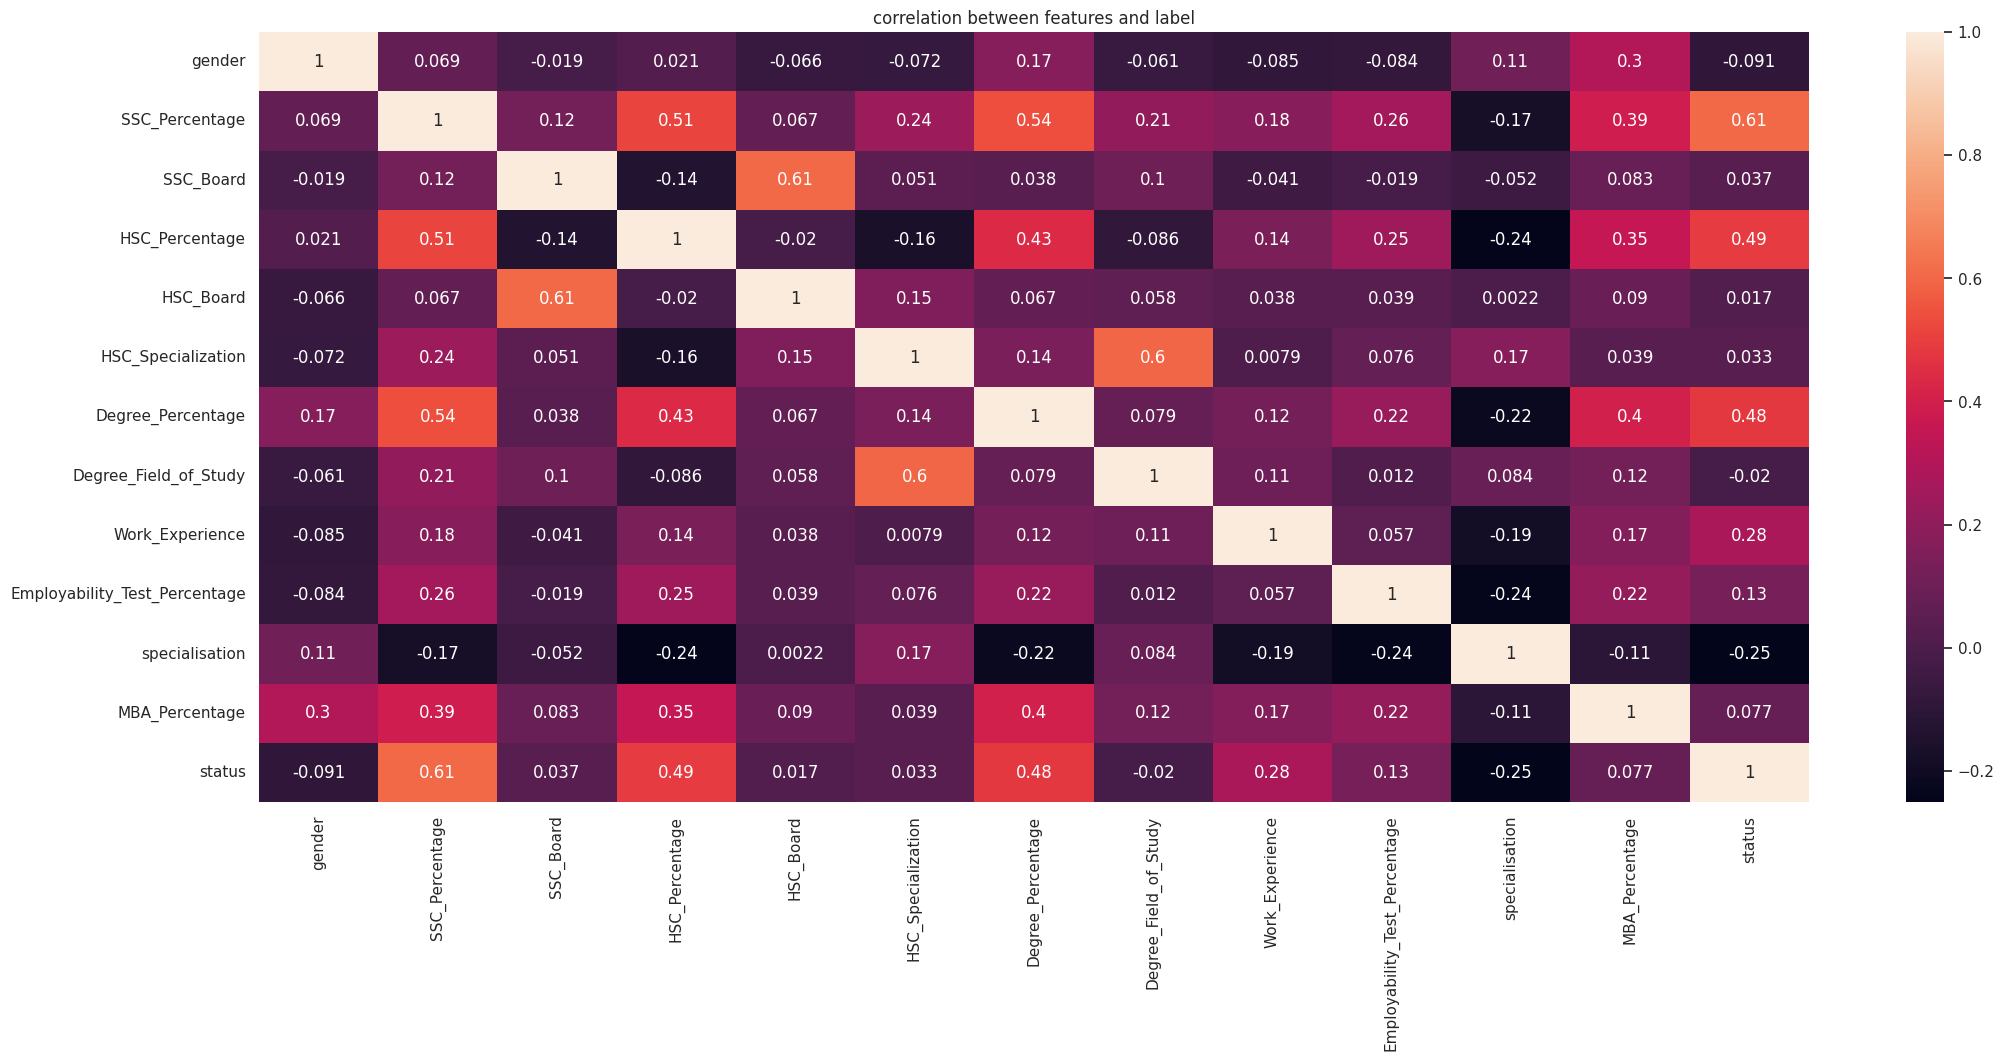

In [ ]:
plt.figure(figsize=(25,10))
plt.title("correlation between features and label")
sns.set_theme(style="white")
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.show()

Splitting the dataset

In [ ]:
# Split the dataset into features (X) and target (y)
x = data.drop('status', axis=1)
y= data['status']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
# Select the numerical features for scaling
numerical_features = ['SSC_Percentage', 'HSC_Percentage', 'Degree_Percentage', 'Employability_Test_Percentage', 'MBA_Percentage']
# Create a StandardScaler object
scaler = StandardScaler()
# Apply feature scaling to the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

Fitting the model using Logistic Regression

In [ ]:
# Train the Support Vector Classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

Predicting the target variable (status) for the training set (x_train) using the trained Support Vector Classifier (svc). The predicted values are stored in y_pred_train.
Predicting the target variable for the test set (x_test) using the trained Support Vector Classifier. The predicted values are stored in y_pred_test.

In [ ]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

The **accuracy score** is a metric that measures the accuracy of the model's predictions. It is calculated as the ratio of the number of correct predictions to the total number of predictions.

The train variable stores the accuracy score for the training set, indicating how well the model performs on the data it was trained on.

The test variable stores the accuracy score for the test set, providing an estimate of how well the model generalizes to unseen data.

Higher accuracy scores indicate better performance, as they indicate a higher proportion of correct predictions. However, it's important to evaluate the model's performance using other metrics as well, such as precision, recall, and F1 score, to have a more comprehensive understanding of its effectiveness.

Computing the accuracy score for the training set by comparing the predicted values (y_pred_train) with the actual values (y_train).
Computing the accuracy score for the test set by comparing the predicted values (y_pred_test) with the actual values (y_test).

In [ ]:
train=accuracy_score(y_train,y_pred_train)
test=accuracy_score(y_test,y_pred_test)

In [ ]:
print("Training accuracy:",train)
print("Testing accuracy:",test)

Training accuracy: 0.8895348837209303
Testing accuracy: 0.8837209302325582


This will print the classification report, including metrics such as precision, recall, F1-score, and support, for each class in the training set. It provides a detailed evaluation of the model's performance for each class, allowing you to assess its precision and recall for both positive and negative classes.

In [ ]:
print("Trainig classification report:\n",classification_report(y_train,y_pred_train))
print("Testing classification report:\n",classification_report(y_test,y_pred_test))

Trainig classification report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82        55
           1       0.91      0.93      0.92       117

    accuracy                           0.89       172
   macro avg       0.88      0.87      0.87       172
weighted avg       0.89      0.89      0.89       172

Testing classification report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



The f1_score function from the sklearn.metrics module is used to compute the F1 score, which is the harmonic mean of precision and recall. The F1 score is a metric commonly used in binary classification problems to evaluate the model's performance by considering both precision and recall.

In [ ]:
print("Training F1 score:",f1_score(y_train, y_pred_train))
print("Testing F1 score:",f1_score(y_test, y_pred_test))

Training F1 score: 0.919831223628692
Testing F1 score: 0.9206349206349206


In [ ]:
# Create input data as a NumPy array
input_data = np.array([[0, 87, 0, 95, 0, 2, 78, 2, 0, 0, 1, 0]])
input_data_as_array=np.asarray(input_data)
reshape=input_data_as_array.reshape(1,-1)
# Make predictions
prediction = lr.predict(reshape)

# Print the prediction
if prediction[0] == 1:
    print("Student placed")
else:
    print("Not placed")

Student placed


Saved the training model

In [ ]:
import pickle

In [ ]:
file="campus_placement.sav"
pickle.dump(lr,open(file,'wb'))

In [ ]:
#loaded the saved model
model=pickle.load(open('campus_placement.sav','rb'))

In [ ]:
# Create input data as a NumPy array
input_data = np.array([[0, 87, 0, 95, 0, 2, 78, 2, 0, 0, 1, 0]])
input_data_as_array=np.asarray(input_data)
reshape=input_data_as_array.reshape(1,-1)
# Make predictions
prediction = model.predict(reshape)

# Print the prediction
if prediction[0] == 1:
    print("Student placed")
else:
    print("Not placed")

Student placed


In [ ]:
for column in data.columns:
  print(column)

gender
SSC_Percentage
SSC_Board
HSC_Percentage
HSC_Board
HSC_Specialization
Degree_Percentage
Degree_Field_of_Study
Work_Experience
Employability_Test_Percentage
specialisation
MBA_Percentage
status
